In [2]:
# Import necessary modules
from pathlib import Path
from src.data import generateData
from src.features import helpers as hp
from src.visualization import helpers as hpVis
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import clear_output
from scipy.ndimage import gaussian_filter1d,convolve1d
from scipy.signal import convolve2d
from IPython import display
from scipy.spatial import distance



class LinearReg():

    def __init__(self, x, y):
        from sklearn.linear_model import LinearRegression

        self.lr_model = LinearRegression()

        self.x = x.reshape(-1, 1)
        self.y = y.reshape(-1, 1)

        self.lr_model.fit(self.x, self.y)

        self.rr = self.lr_model.score(self.x, self.y)

    def get_fitted_line(self):
        return [self.x, self.lr_model.predict(self.x)]

    def get_coefficients(self):
        return self.lr_model.coef_[0, 0], self.lr_model.intercept_[0]

    def get_score(self, x=0, y=0):
        if x == 0 or y == 0:
            return self.rr
        else:
            return self.lr_model.score(x, y)

    def print_coefficients(self):
        print('Gain: {0:1.2f}, Bias: {1:1.2f}, , r^2: {2:1.2f}'.format(self.lr_model.coef_[0, 0], self.lr_model.intercept_[0], self.rr))
        return ('Gain: {0:1.2f},\nBias: {1:1.2f},\n' + r'$r^2$: {2:1.2f}').format(self.lr_model.coef_[0, 0], self.lr_model.intercept_[0], self.rr)



In [13]:

class SOM():
    
    def __init__(self,start_learning_rate,start_sigma,lambda_ = 100,grid_dim = (10,1), input_dim=2):
#         np.random.seed(20)
        self.w = np.random.rand(grid_dim[0],grid_dim[1],input_dim) * 0.01 +1
        self.epsi_init = start_learning_rate
        self.epsi = self.epsi_init
        self.sigma_init = start_sigma
        self.sigma = self.sigma_init
        self.grid_dim = grid_dim
        self.t = 0
        self.lambda_ = lambda_
        self.ind_s = (0,0)
        self.grid = np.asarray(np.unravel_index(np.arange(grid_dim[0]*grid_dim[1]),grid_dim))
    
    def update_w(self,v):
        
        # determine best matching unit and its index
        tmp = np.sum((v-self.w)**2,2)**(1/2)
        s = tmp.min()
        # index on grid
        ind_s = np.asarray(np.unravel_index(np.argmin(tmp),self.grid_dim))
        self.ind_s  = ind_s   
        # create neigborhood function
        h = self.neighbour(self.grid,ind_s)
        # bring it back to grid stucture
        h = h.reshape(self.grid_dim[0],self.grid_dim[1])
        self.w += self.epsi * (h.T * (v-self.w).T).T
        
        # update the learning rate and neighborhood sigma
        self.update_rates()
        
        
    def neighbour(self,ind,ind_s):
        
        return np.exp( -  np.sum((ind.T-ind_s)**2,1) / (2*self.sigma**2) )
                      
    def update_rates(self):
        self.epsi = self.epsi_init * np.exp(-self.t / self.lambda_)
        self.sigma = self.sigma_init * np.exp(-self.t / self.lambda_)
        self.t += 1



In [6]:
input_data_x,input_data_y = np.meshgrid(np.linspace(0,1,10),np.linspace(0,1,10))
input_data = np.array([input_data_x,input_data_y]).reshape(2,len(input_data_x)*len(input_data_y)).T+0.5

net = SOM(0.01, 2, lambda_ = 50000 ,grid_dim=(5,5),input_dim=2)

for i in range(50000):
    ind = np.random.randint(0,input_data.shape[0])
    net.update_w(input_data[ind,:])
    
    if i % 10 == 0:
        display.clear_output(wait=True)
        fig = plt.figure(figsize=(10,10))

        ax = fig.add_subplot(111)
        ax.scatter(input_data[:,0],input_data[:,1],color='blue')
        ax.scatter(net.w[:,:,0],net.w[:,:,1],color='red')
        ax.scatter(input_data[ind,0],input_data[ind,1],s=200,color='black',facecolor='green')
        x = net.ind_s[0]
        y = net.ind_s[1]
        ax.scatter(net.w[x,y,0],net.w[x,y,1],s=200,color='black',facecolor='none')
        ax.set_xlim(0,2)
        ax.set_ylim(0,2)
        plt.show()
    

KeyboardInterrupt: 

In [1]:
class SOM():
    
    def __init__(self,start_learning_rate,start_sigma,lambda_ = 100,grid_dim = (10,1), input_dim=2):
        np.random.seed(20)
        # initialize weights
        self.w = np.random.rand(grid_dim[0],grid_dim[1],input_dim)* 0.1 +0.5
        # set initial learning rate
        self.epsi_init = start_learning_rate
        self.epsi = self.epsi_init
        # set initial neighborhood sigma
        self.sigma_init = start_sigma
        self.sigma = self.sigma_init
        # set grid dimensions of neurons
        self.grid_dim = grid_dim
        # initial time
        self.t = 0
        # set total amount of training steps
        self.lambda_ = lambda_
        # set grid structure
        self.grid = np.asarray(np.unravel_index(np.arange(grid_dim[0]*grid_dim[1]),grid_dim))
    
    def update_w(self,v):
        
        # determine best matching unit and its index
        tmp = np.sum((v-self.w)**2,2)**(1/2)
        s = tmp.min()
        # index on grid
        ind_s = np.asarray(np.unravel_index(np.argmin(tmp),self.grid_dim))
        self.ind_s  = ind_s   
        # create neigborhood function
        h = self.neighbour(self.grid,ind_s)
        # bring it back to grid stucture
        h = h.reshape(self.grid_dim[0],self.grid_dim[1])
        self.w += self.epsi * (h.T * (v-self.w).T).T
        
        # update the learning rate and neighborhood sigma
        self.update_rates()
        
        
    def neighbour(self,ind,ind_s):
        # define neighbor relationship
        return np.exp( -  np.sum((ind.T-ind_s)**2,1) / (2*self.sigma**2) )
                      
    def update_rates(self):
        # update learning rate
        self.epsi = self.epsi_init * np.exp(-self.t / self.lambda_)
        # update sigma for neighborhood function
        self.sigma = self.sigma_init * np.exp(-self.t / self.lambda_)
        # incremenbt time 
        self.t += 1


# SOMS for HRTFs

In [8]:
########################################################################
######################## Set parameters ################################
########################################################################
azimuth = 12
snr = 0.0
freq_bands = 128
participant_number = 9

normalize = False
time_window = 0.1  # time window in sec

# filtering parameters
normalization_type = 'sum_1'
sigma_smoothing = 0
sigma_gauss_norm = 1

# use the mean subtracted map as the learned map
mean_subtracted_map = True

ear = 'ipsi'

elevations = np.arange(0, 25, 1)

sound_types = np.arange(0,20)


############################################################
#                  Simulation parameter                    #
############################################################

#generate inputs
psd_all_c, psd_all_i = generateData.create_data(freq_bands, participant_number, snr, normalize, azimuth, time_window)

# Take only given elevations
input_c = psd_all_c[:, elevations, :]
input_i = psd_all_i[:, elevations, :]

# normalize inputs over frequencies
input_c = input_c / input_c.sum(2)[:,:,np.newaxis]
input_i = input_i / input_i.sum(2)[:,:,np.newaxis]

Data set found. Loading from file : data/processed/binaural_right_0_gammatone_0.1_window_009_cipic_0_srn_128_channels_0_azi_False_norm.npy


In [9]:



all_maps = np.zeros((len(sound_types),len(elevations),freq_bands))

for i_sounds,sound in enumerate(sound_types):

    in_i = np.squeeze(input_i[sound,:,:])
    in_c = np.squeeze(input_c[sound,:,:])



    # Comp Map
    tmp1 = in_i
    tmp1 = tmp1/gaussian_filter1d(tmp1, sigma=1, mode='nearest', axis=1)
    
    tmp2 = in_c
    tmp2 = tmp2/gaussian_filter1d(tmp2, sigma=1, mode='nearest', axis=1)
    tmp3 = tmp1/(tmp1+tmp2)
    all_maps[i_sounds,:,:] = tmp3





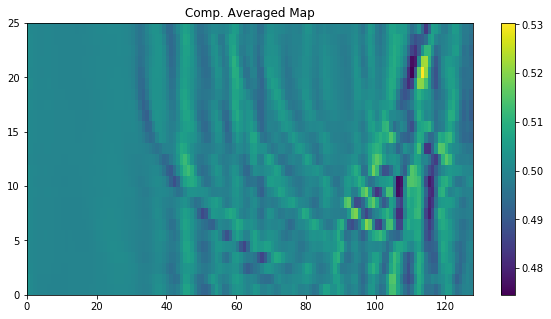

In [10]:
input_data = all_maps



fig = plt.figure(figsize=(10,5))

axs = fig.subplots(nrows=1,ncols=1,squeeze=False)

ax = axs[0,0]
ax.set_title('Comp. Averaged Map')

# input_data = (input_data.T/ input_data.sum(1)).T

c = ax.pcolormesh(input_data.mean(0))
plt.colorbar(c)



plt.show()

In [15]:

iterations = 100000

net = SOM(0.01, 7, lambda_ = iterations ,grid_dim=(25,1),input_dim=128)

sounds = np.arange(0,10)


for i in range(iterations):
    i_sound = np.random.randint(0,input_data.shape[0])
    i_ele = np.random.randint(0,input_data.shape[1])
    net.update_w(input_data[i_sound,i_ele,:])
    
    if i % 500 == 0:
        display.clear_output(wait=True)
#         fig = plt.figure(figsize=(10,10))

#         ax = fig.add_subplot(111)
        
#         c = ax.pcolorfast(np.squeeze(net.w))
#         plt.colorbar(c)
        
# #         ax.scatter(input_data[:,0],input_data[:,1],color='blue')
# #         ax.scatter(net.w[:,:,0],net.w[:,:,1],color='red')
# #         ax.scatter(input_data[ind,0],input_data[ind,1],s=200,color='black',facecolor='green')
# #         x = net.ind_s[0]
# #         y = net.ind_s[1]
# #         ax.scatter(net.w[x,y,0],net.w[x,y,1],s=200,color='black',facecolor='none')
# #         ax.set_xlim(0,2)
# #         ax.set_ylim(0,2)
#         plt.show()
        print(i)
    
    


99500


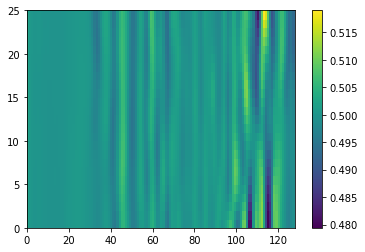

In [17]:
fig = plt.figure()
axes = fig.subplots(1,1,squeeze=False)
ax = axes[0,0]
c = ax.pcolormesh(np.squeeze(net.w))
plt.colorbar(c)
plt.show()

## Learning Results

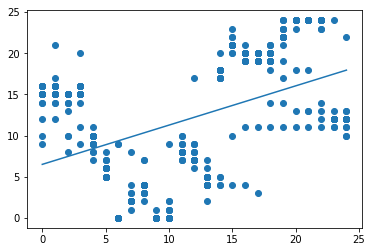

In [19]:

fig = plt.figure()
axes = fig.subplots(1,1,squeeze=False)
ax = axes[0,0]

results = np.zeros((len(sound_types),len(elevations),2))
for i_sound,sound in enumerate(sound_types):
    for i_ele,ele in enumerate(elevations):
        
        test_sound = np.squeeze(all_maps[i_sound,i_ele,:])

        # calculate correlation
        cor = distance.cdist(np.squeeze(net.w), test_sound[np.newaxis], metric='correlation')

        results[i_sound,i_ele,0] = i_ele
        results[i_sound,i_ele,1] = np.argmin(cor)

        
ax.scatter(results[:,:,0],results[:,:,1])
lr = LinearReg(results[:,:,0],results[:,:,1])
x,y = lr.get_fitted_line()
g,b = lr.get_coefficients()
r   = lr.get_score()
ax.plot(x,y)
plt.show()




## Parameter Sweep for Learning

In [185]:


iteration_numbers = np.array([10000,50000,100000,150000])

learning_rates = np.array([0.1,0.05,0.01,0.005,0.001])

sigmas = np.array([3,5,7,9])


iterations = 150000

lr_results = np.zeros((len(iteration_numbers),len(learning_rates),len(sigmas),3))

nets = []

for i_iter,iters in enumerate(iteration_numbers):
    for i_learn,learn in enumerate(learning_rates):
        for i_sig,sig in enumerate(sigmas):

            net = SOM(learn, sig, lambda_ = iters ,grid_dim=25,input_dim=128)



            for i in range(iters):
                ind = np.random.randint(0,input_data.shape[0])
                net.update_w(input_data[ind,:])

            nets.append(net)
            
            results = np.zeros((len(sound_types),len(elevations),2))
            for i_sound,sound in enumerate(sound_types):
                for i_ele,ele in enumerate(elevations):

                    test_sound = np.squeeze(all_maps[i_sound,i_ele,:])

                    # calculate correlation
                    cor = distance.cdist(net.w, test_sound[np.newaxis], metric='correlation')

                    results[i_sound,i_ele,0] = i_ele
                    results[i_sound,i_ele,1] = np.argmin(cor)


            lr = LinearReg(results[:,:,0],results[:,:,1])
            x,y = lr.get_fitted_line()
            g,b = lr.get_coefficients()
            r   = lr.get_score()

            lr_results[i_iter,i_learn,i_sig] = [g,b,r] 

            clear_output(wait=True)
            print(i_iter,i_learn,i_sig)



3 4 3


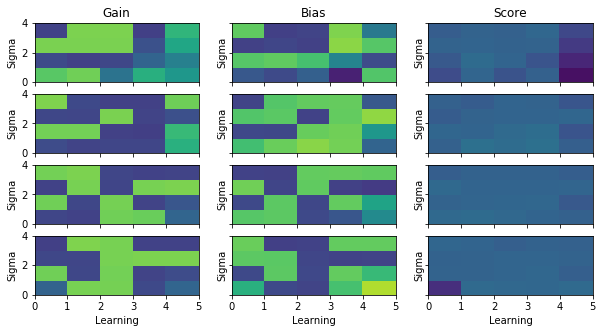

In [315]:
fig = plt.figure(figsize=(10,5))
axes = fig.subplots(len(iteration_numbers),3,squeeze=False,sharex=True,sharey=True)

for i_iter,iters in enumerate(iteration_numbers):
    ax = axes[i_iter,0]
    if i_iter == 0:
        ax.set_title('Gain')
    ax.pcolor(np.squeeze(lr_results[i_iter,:,:,0].T),vmin=-1,vmax=1)
    ax.set_ylabel('Sigma')
    if i_iter == len(iteration_numbers)-1:
        ax.set_xlabel('Learning')
    
    ax = axes[i_iter,1]
    if i_iter == 0:
        ax.set_title('Bias')
    ax.pcolor(np.squeeze(lr_results[i_iter,:,:,1].T),vmin=0,vmax=25)
    ax.set_ylabel('Sigma')
    if i_iter == len(iteration_numbers)-1:
        ax.set_xlabel('Learning')

    ax = axes[i_iter,2]
    if i_iter == 0:
        ax.set_title('Score')
    ax.pcolor(np.squeeze(lr_results[i_iter,:,:,2].T),vmin=0,vmax=1)
    ax.set_ylabel('Sigma')
    if i_iter == len(iteration_numbers)-1:
        ax.set_xlabel('Learning')
plt.show()